In [1]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

c:\Users\ravin\OneDrive\Documents\Vision-based-Urban-Issues-Detection\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\ravin\OneDrive\Documents\Vision-based-Urban-Issues-Detection\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\ravin\OneDrive\Documents\Vision-based-Urban-Issues-Detection\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version olde

In [2]:
path = "C:\\Users\\ravin\\OneDrive\\Documents\\DamagedRoadSigns\\train\\images"
annot = "C:\\Users\\ravin\\OneDrive\\Documents\\DamagedRoadSigns\\train\\labels"

Processing: 0aad64567664f31b63fe4a5041fd9b89-graffiti-pictures-science_jpg.rf.e9d37c5c75db18b92d8c19b65201e615.jpg


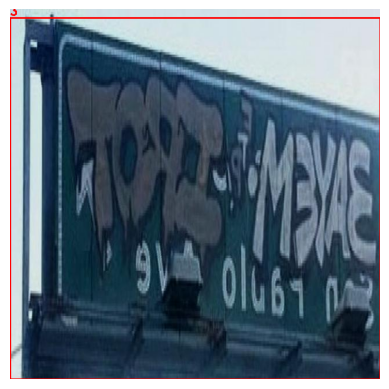

Processing: 0_Screenshot-156_result_jpg.rf.1a8c36676a894451efb1f966f1c3443e.jpg


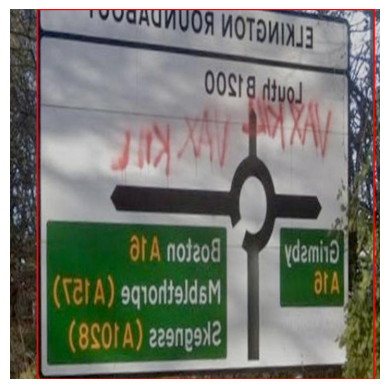

Processing: 0_Screenshot-156_result_jpg.rf.fa40649c2951a76bcc0c378f07137c01.jpg


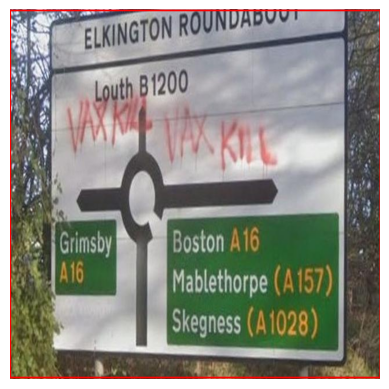

Processing: 1_JMP_RGR_280621SIGN_02JPG_jpg.rf.26510e3e490a38dacbb22d9d63f923a0.jpg


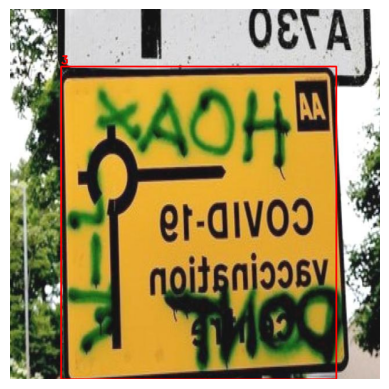

Processing: 1_JMP_RGR_280621SIGN_02JPG_jpg.rf.7fd6691400866d421090381d2c6d94d8.jpg


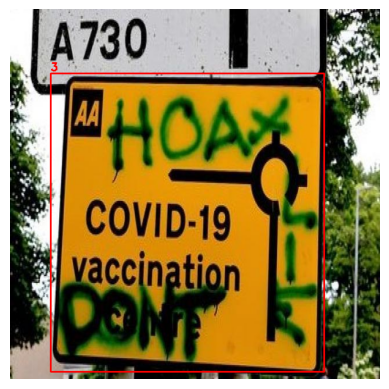

Processing: 45495337-5d4c-41f5-a63e-1db7764cb962-large16x9_I40Grafitti2_jpg.rf.0e78c4e990ba3363ca1c95f1619fc946.jpg


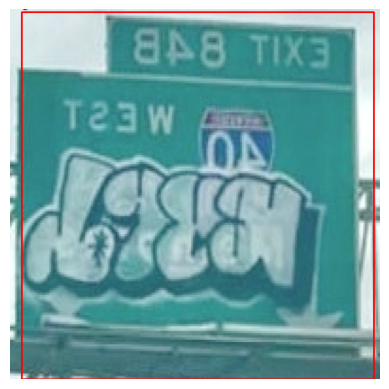

Processing: 45495337-5d4c-41f5-a63e-1db7764cb962-large16x9_I40Grafitti2_jpg.rf.10f4c967643e413894addedb70d48a1b.jpg


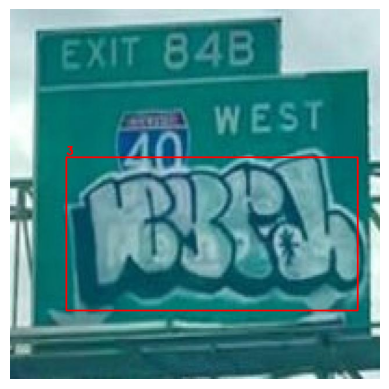

Processing: 45495337-5d4c-41f5-a63e-1db7764cb962-large16x9_I40Grafitti2_jpg.rf.71019075c503ed0cd4902efaa4090673.jpg


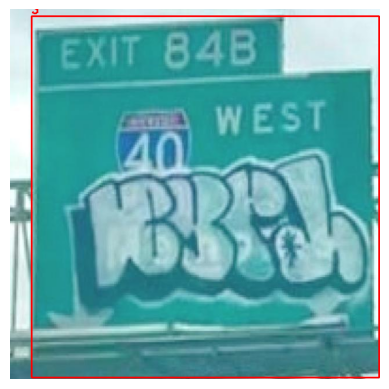

Processing: 45495337-5d4c-41f5-a63e-1db7764cb962-large16x9_I40Grafitti_jpg.rf.7493da50846a591ea4bd0d22d801143f.jpg


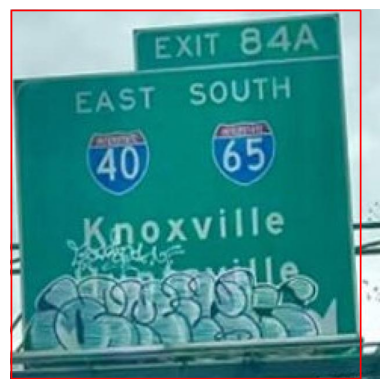

Processing: 4ad0fe2776073788e59f25851b01691b_jpg.rf.fc33fe7be08339db91f240ec0251352b.jpg


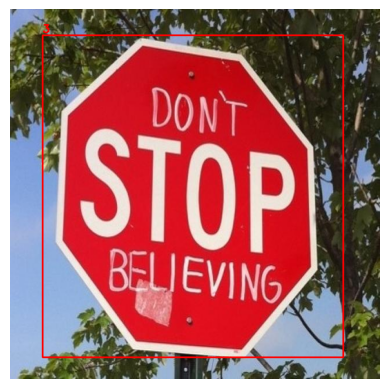

In [3]:
for e, i in enumerate(os.listdir(annot)):
    if e >= 10:
        break

    filename = os.path.splitext(i)[0] + ".jpg"
    img_path = os.path.join(path, filename)
    print("Processing:", filename)

    img = cv2.imread(img_path)
    if img is None:
        print(f"❌ Could not load {img_path}")
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    # Read YOLO annotations
    with open(os.path.join(annot, i), "r") as f:
        for line in f:
            parts = line.strip().split()
            cls_id = int(parts[0])
            x_center = float(parts[1]) * w
            y_center = float(parts[2]) * h
            bbox_width = float(parts[3]) * w
            bbox_height = float(parts[4]) * h

            x1 = int(x_center - bbox_width / 2)
            y1 = int(y_center - bbox_height / 2)
            x2 = int(x_center + bbox_width / 2)
            y2 = int(y_center + bbox_height / 2)

            cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(img_rgb, str(cls_id), (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()


In [4]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [5]:
im = cv2.imread(os.path.join(path,"42850.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
#     print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [6]:
train_images=[]
train_labels=[]

In [14]:
def get_iou(boxA, boxB):
    # boxA and boxB: dicts with x1,x2,y1,y2 pixel coords
    xA = max(boxA['x1'], boxB['x1'])
    yA = max(boxA['y1'], boxB['y1'])
    xB = min(boxA['x2'], boxB['x2'])
    yB = min(boxA['y2'], boxB['y2'])

    interWidth = max(0, xB - xA)
    interHeight = max(0, yB - yA)
    interArea = interWidth * interHeight

    boxAArea = (boxA['x2'] - boxA['x1']) * (boxA['y2'] - boxA['y1'])
    boxBArea = (boxB['x2'] - boxB['x1']) * (boxB['y2'] - boxB['y1'])

    iou = interArea / float(boxAArea + boxBArea - interArea + 1e-6)
    return iou

In [15]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [21]:
for e, i in enumerate(os.listdir(annot)):
    try:
        # Only skip non-txt files if needed
        if not i.endswith(".txt"):
            continue
        
        filename = os.path.splitext(i)[0] + ".jpg"
        print(e, filename)
        image = cv2.imread(os.path.join(path, filename))
        img_h, img_w = image.shape[:2]

        # Read YOLO annotations and convert to pixel bbox
        gtvalues = []
        with open(os.path.join(annot, i), 'r') as f:
            for line in f:
                parts = line.strip().split()
                class_id = int(parts[0])
                x_center = float(parts[1])
                y_center = float(parts[2])
                width = float(parts[3])
                height = float(parts[4])

                x1 = int((x_center - width / 2) * img_w)
                y1 = int((y_center - height / 2) * img_h)
                x2 = int((x_center + width / 2) * img_w)
                y2 = int((y_center + height / 2) * img_h)

                gtvalues.append({"x1": x1, "y1": y1, "x2": x2, "y2": y2})

        # Continue your code here (Selective Search, IoU etc.)
        ss.setBaseImage(image)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()

        imout = image.copy()
        counter = 0
        falsecounter = 0
        flag = 0
        fflag = 0
        bflag = 0

        for e, result in enumerate(ssresults):
            if e < 2000 and flag == 0:
                for gtval in gtvalues:
                    x, y, w, h = result
                    iou = get_iou(gtval, {"x1": x, "x2": x + w, "y1": y, "y2": y + h})

                    if counter < 30 and iou > 0.7:
                        timage = imout[y:y + h, x:x + w]
                        if timage.size == 0:
                            continue
                        resized = cv2.resize(timage, (224, 224), interpolation=cv2.INTER_AREA)
                        train_images.append(resized)
                        train_labels.append(1)
                        counter += 1
                    else:
                        fflag = 1

                    if falsecounter < 30 and iou < 0.3:
                        timage = imout[y:y + h, x:x + w]
                        if timage.size == 0:
                            continue
                        resized = cv2.resize(timage, (224, 224), interpolation=cv2.INTER_AREA)
                        train_images.append(resized)
                        train_labels.append(0)
                        falsecounter += 1
                    else:
                        bflag = 1

                if fflag == 1 and bflag == 1:
                    flag = 1

    except Exception as e:
        print(e)
        print("error in " + i)
        continue


0 0aad64567664f31b63fe4a5041fd9b89-graffiti-pictures-science_jpg.rf.e9d37c5c75db18b92d8c19b65201e615.jpg
1 0_Screenshot-156_result_jpg.rf.1a8c36676a894451efb1f966f1c3443e.jpg
2 0_Screenshot-156_result_jpg.rf.fa40649c2951a76bcc0c378f07137c01.jpg
3 1_JMP_RGR_280621SIGN_02JPG_jpg.rf.26510e3e490a38dacbb22d9d63f923a0.jpg
4 1_JMP_RGR_280621SIGN_02JPG_jpg.rf.7fd6691400866d421090381d2c6d94d8.jpg
5 45495337-5d4c-41f5-a63e-1db7764cb962-large16x9_I40Grafitti2_jpg.rf.0e78c4e990ba3363ca1c95f1619fc946.jpg
6 45495337-5d4c-41f5-a63e-1db7764cb962-large16x9_I40Grafitti2_jpg.rf.10f4c967643e413894addedb70d48a1b.jpg
7 45495337-5d4c-41f5-a63e-1db7764cb962-large16x9_I40Grafitti2_jpg.rf.71019075c503ed0cd4902efaa4090673.jpg
8 45495337-5d4c-41f5-a63e-1db7764cb962-large16x9_I40Grafitti_jpg.rf.7493da50846a591ea4bd0d22d801143f.jpg
9 4ad0fe2776073788e59f25851b01691b_jpg.rf.fc33fe7be08339db91f240ec0251352b.jpg
10 5290151_050719-kgo-graffiti-covered-highway-sign-img_Image_00-00-17-022_jpg.rf.e9fc9d88482f3812ce969ca18

KeyboardInterrupt: 

In [17]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [18]:
X_new.shape

(0,)

In [19]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [20]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

233906176/553467096 ━━━━━━━━━━━━━━━━━━━━ 4:21 1us/step

ConnectionAbortedError: [WinError 10053] An established connection was aborted by the software in your host machine

In [ ]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

In [ ]:
X= vggmodel.layers[-2].output

In [ ]:
predictions = Dense(2, activation="softmax")(X)

In [ ]:
model_final = Model(input = vggmodel.input, output = predictions)

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)

In [ ]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

In [ ]:
model_final.summary()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [ ]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [ ]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [ ]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [ ]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 1000, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

In [ ]:
im = X_test[1600]
plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model_final.predict(img)
if out[0][0] > out[0][1]:
    print("plane")
else:
    print("not plane")

In [ ]:
z=0
for e,i in enumerate(os.listdir(path)):
    if i.startswith("4"):
        z += 1
        img = cv2.imread(os.path.join(path,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        for e,result in enumerate(ssresults):
            if e < 2000:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                if out[0][0] > 0.65:
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        plt.figure()
        plt.imshow(imout)